<a href="https://colab.research.google.com/github/MinhoJu/SRT/blob/master/WTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<Figure size 1600x1280 with 0 Axes>

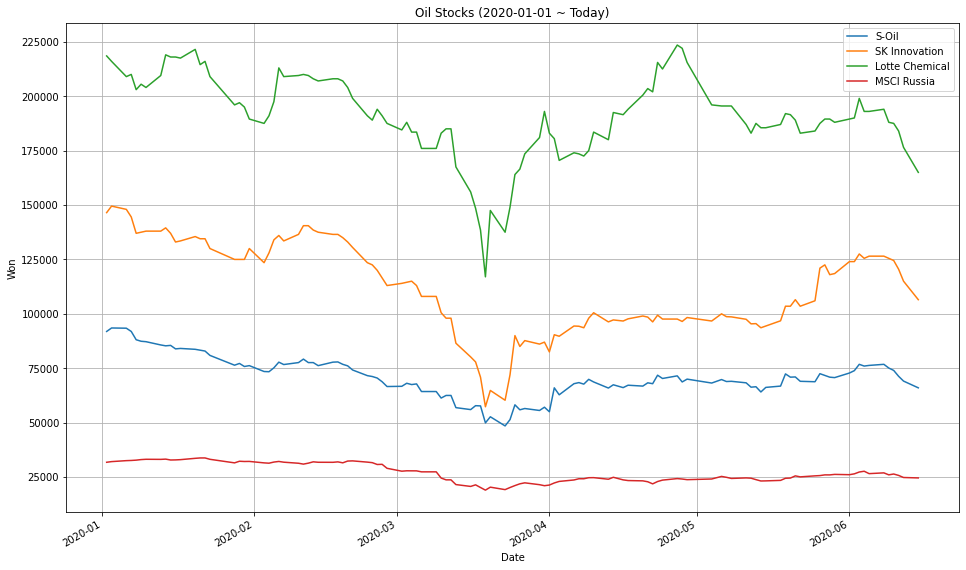

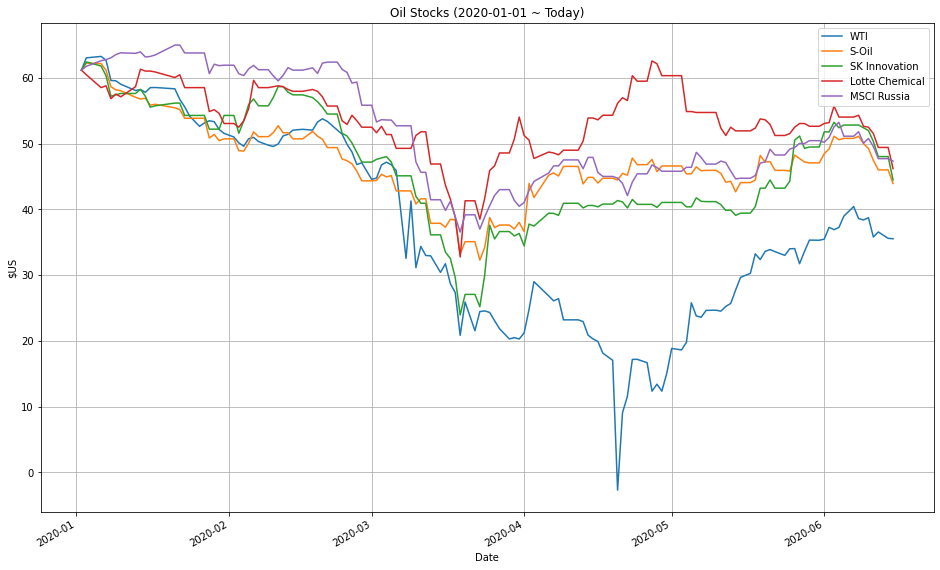

In [1]:
# Import matplotlib 
from pandas_datareader import data
import pandas_datareader as pdr
import datetime 
from datetime import date, timedelta
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')

df_oil = pd.DataFrame()

start = datetime.datetime(2020, 1, 1)
end = date.today()

symbols = {'010950.KS':'S-Oil', '096770.KS':'SK Innovation', '011170.KS':'Lotte Chemical', '265690.KS':'MSCI Russia'}

for symbol in symbols:
  oil = pdr.get_data_yahoo(symbol, start=start, end=end)
  df_oil[symbols[symbol]] = oil['Close']


# Show plot
df_oil.plot(grid=True, figsize=(16, 10))
plt.title('Oil Stocks (2020-01-01 ~ Today)')
plt.ylabel('Won')
plt.show()


df_wti = pd.DataFrame()

# WTI
wti_cl = pdr.get_data_yahoo('CL=F', start=start, end=end)
df_wti['WTI'] = wti_cl['Close']

# df_wti_fund['Close'] = (df_wti_fund['Close']*47.18) / 287.98
for symbol in symbols:
  oil = pdr.get_data_yahoo(symbol, start=start, end=end)
  df_wti[symbols[symbol]] = (oil['Close']*wti_cl['Close'][0]) / oil['Close'][0]

df_wti.fillna(method='ffill', inplace=True)

# Show plot
df_wti.plot(grid=True, figsize=(16, 10))
plt.title('Oil Stocks (2020-01-01 ~ Today)')
plt.ylabel('$US')
plt.show()

In [2]:
# Import matplotlib 
from pandas_datareader import data
import pandas_datareader as pdr
import datetime 
from datetime import date, timedelta
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
 
df = pd.DataFrame()
wti_dict = dict()
 
start = datetime.datetime(2020, 3, 1)
end = date.today()
 
# KODEX WTI
kodex_wti = pdr.get_data_yahoo('261220.KS', start=start, end=end)
df['KODEX WTI'] = (kodex_wti['Close']*47.18) /16500
 
# Ours
df['SA_JU'] = (kodex_wti['Close']*0) + 25.01
 
# WTI Fund (KR5105924298)
link = 'http://m.samsungfund.com/retFundPrice_Excel.action?fId=1M2101&officeCoCd=0030200000&currencyCd='
df_excel = pd.read_excel(link,'www.samsungfund.com')
df_excel['일자'] = pd.to_datetime(df_excel['일자']) - datetime.timedelta(days=1)
data = df_excel.to_numpy()
columns = ['Close', 'Diff', 'Close2', 'Diff2']
df_wti_fund = pd.DataFrame(data=data[0:,1:],
                  index=data[0:,0],
                  columns=columns)
df_wti_fund['Close'] = df_wti_fund['Close'].astype(float)
df_wti_fund['Close'] = (df_wti_fund['Close']*47.18) / 287.98
df['Fund WTI'] = df_wti_fund['Close']
 
# WTI
wti_cl = pdr.get_data_yahoo('CL=F', start=start, end=end)
wti_dict['CL=F'] = wti_cl
df['WTI Current'] = wti_cl['Close']
 
# WTI Futures
symbols = ['CLN20.NYM', 'CLQ20.NYM', 'CLU20.NYM', 'CLV20.NYM', 'CLX20.NYM', 'CLZ20.NYM']
 
for symbol in symbols:
  wti = pdr.get_data_yahoo(symbol, start=start, end=end)
  wti_dict[symbol] = wti
 
 
for index in range(3):
  month = index + 7
  df['2020-%d'%month] = wti_dict[symbols[index]]['Close']
 
df.fillna(method='ffill', inplace=True)

<Figure size 1600x1280 with 0 Axes>

In [3]:
df_excel['일자'] = pd.to_datetime(df_excel['일자']) + datetime.timedelta(days=1)
df_excel.head(10)

,일자,기준가격(원),전일대비,과표기준가격(원),전일대비.1
0,2020-06-16,148.15,0.20,149.74,0.05
1,2020-06-15,147.95,0.00,149.69,-0.01
2,2020-06-14,147.95,-0.01,149.70,0.00
3,2020-06-13,147.96,-12.00,149.70,-11.78
4,2020-06-12,159.96,2.41,161.48,2.47
5,2020-06-11,157.55,2.35,159.01,2.29
6,2020-06-10,155.20,-5.95,156.72,-5.72
7,2020-06-09,161.15,7.89,162.44,7.75
8,2020-06-08,153.26,0.00,154.69,0.00
9,2020-06-07,153.26,0.00,154.69,-0.01


In [4]:
df.iloc[::-1].head(10)

,KODEX WTI,SA_JU,Fund WTI,WTI Current,2020-7,2020-8,2020-9
Date,,,,,,,
2020-06-15,15.869636,25.01,24.271536,35.529999,35.529999,35.779999,36.090000
2020-06-12,16.341436,25.01,24.240408,36.560001,36.560001,36.799999,37.009998
2020-06-11,17.428006,25.01,26.206378,35.790001,35.790001,36.029999,36.250000
2020-06-10,17.542382,25.01,25.811546,38.730000,38.730000,38.970001,39.220001
2020-06-09,17.756836,25.01,25.426544,38.389999,38.389999,38.610001,38.849998
2020-06-08,18.285824,25.01,26.401337,38.590000,38.590000,38.830002,39.049999
2020-06-05,17.342224,25.01,25.108712,38.970001,38.970001,39.209999,39.470001
2020-06-04,16.913315,25.01,25.082499,37.250000,37.250000,37.560001,37.880001
2020-06-03,17.428006,25.01,24.792518,36.910000,36.930000,37.240002,37.529999


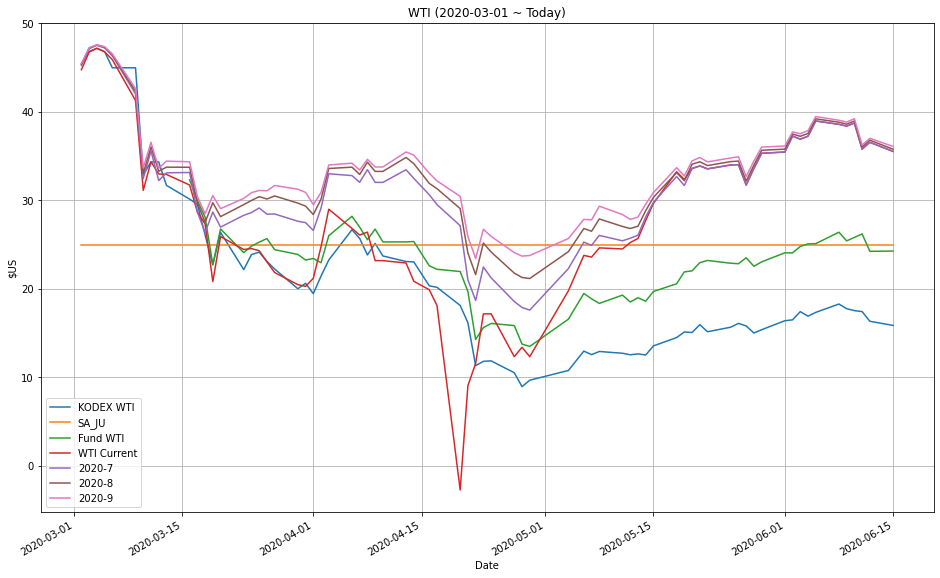

In [5]:
# Show plot
df.plot(grid=True, figsize=(16, 10))
plt.title('WTI (2020-03-01 ~ Today)')
plt.ylabel('$US')
plt.show()

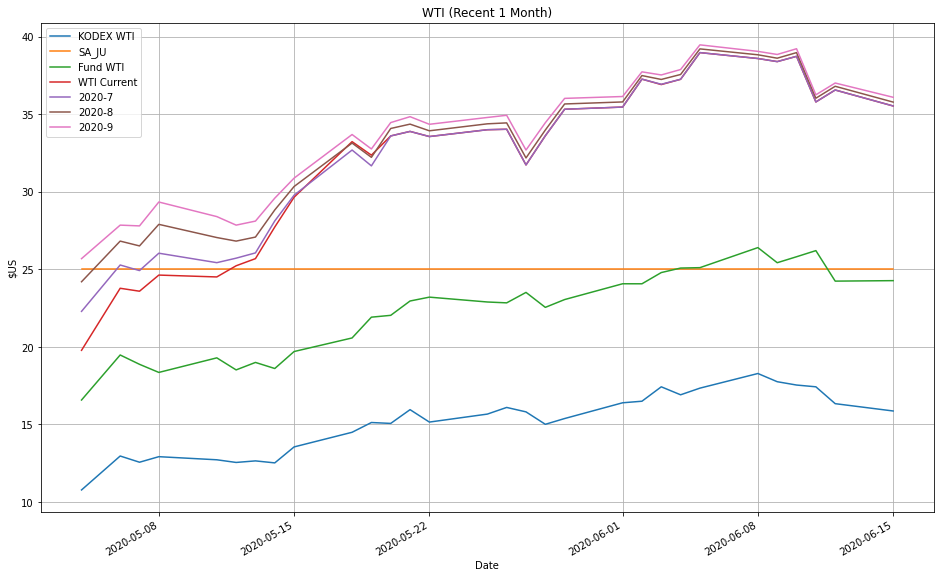

In [6]:
# Plot
df_month = df.tail(30)

# Show plot
df_month.plot(grid=True, figsize=(16, 10))
plt.title('WTI (Recent 1 Month)')
plt.ylabel('$US')
plt.show()

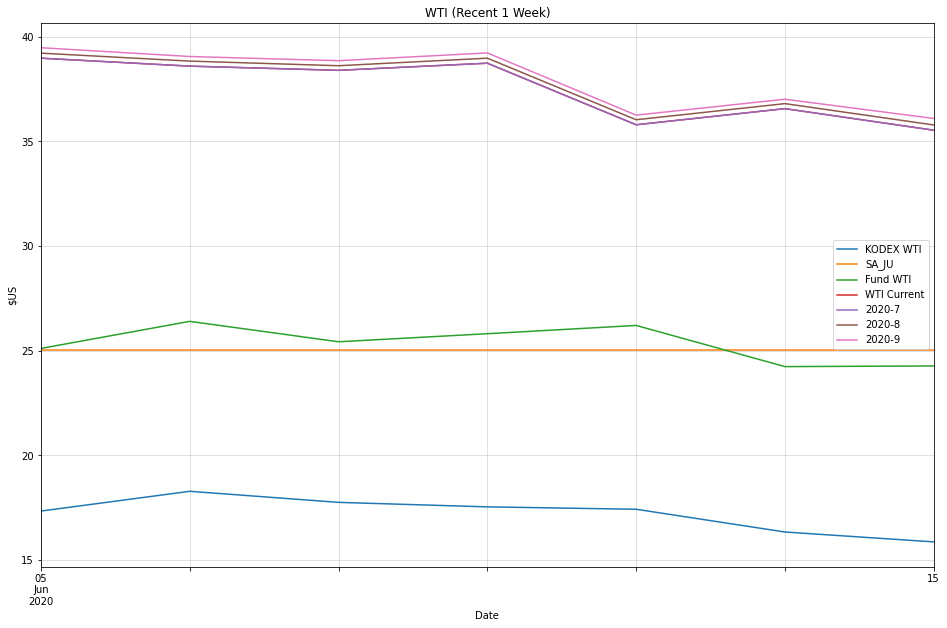

In [7]:
# Plot
df_month = df.tail(7)

# Show plot
ax = df_month.plot(grid=True, figsize=(16, 10))

plt.title('WTI (Recent 1 Week)')
plt.ylabel('$US')
major_ticks = np.arange(0, 30, 1)
ax.xaxis.set_major_locator(mdates.DayLocator())
# ax.set_yticks(major_ticks)


plt.grid(which='both')
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)

plt.show()

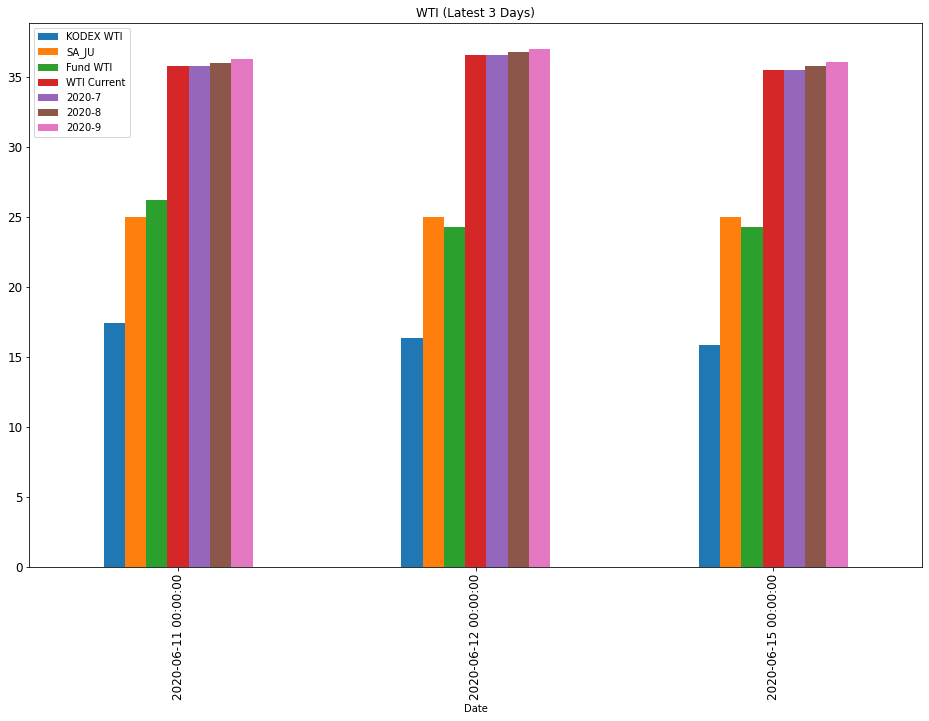

In [8]:
# Plot
df_day = df.tail(3)

# Show plot
ax = df_day.plot(kind='bar', title ="WTI (Latest 3 Days)", figsize=(16, 10), legend=True, fontsize=12)

plt.show()

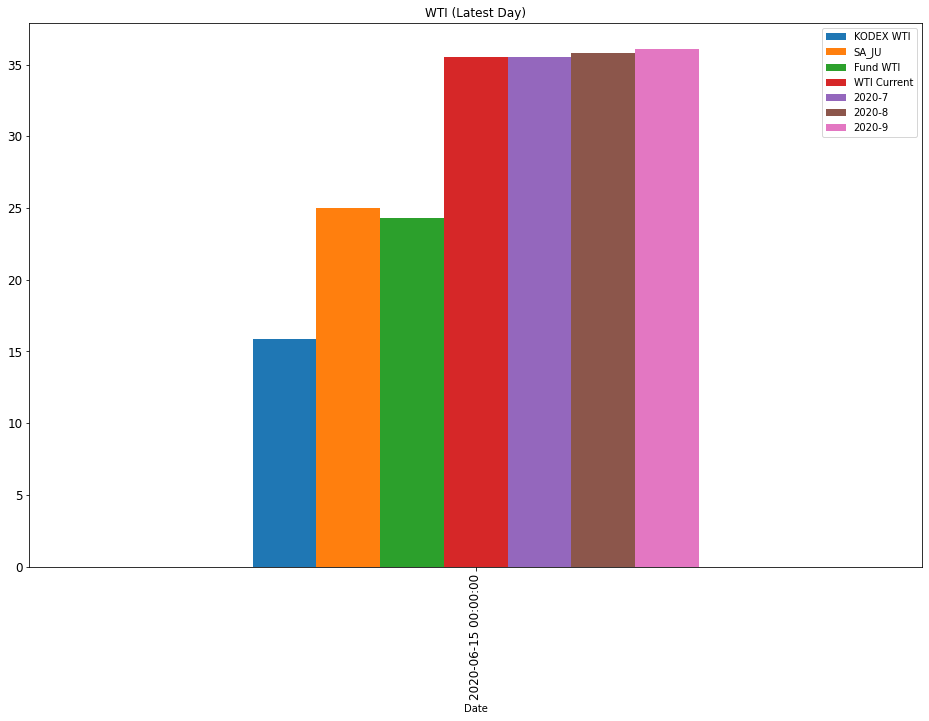

In [9]:
# Plot
df_day = df.tail(1)

# Show plot
ax = df_day.plot(kind='bar', title ="WTI (Latest Day)", figsize=(16, 10), legend=True, fontsize=12)

plt.show()

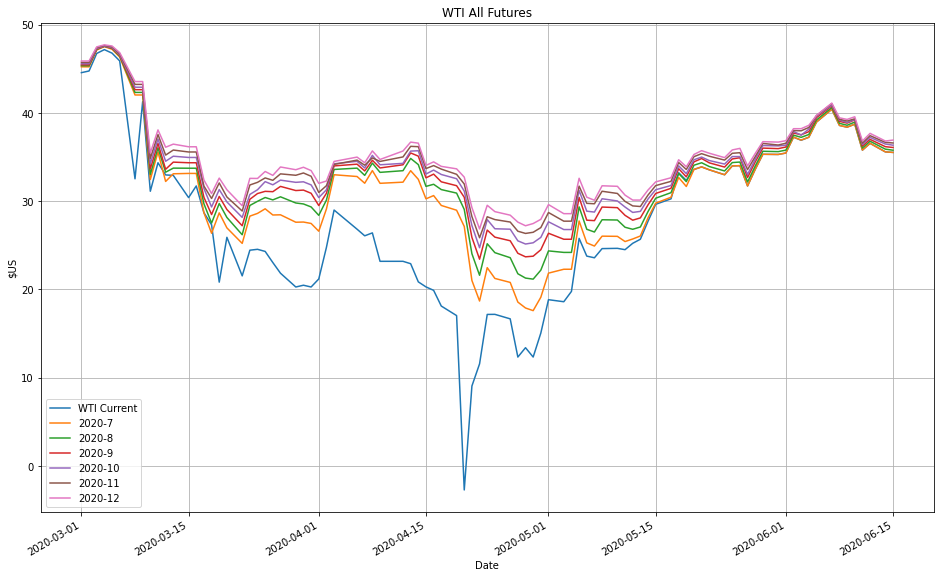

In [10]:
# Plot for all wti futures
df_futures = pd.DataFrame()
df_futures['WTI Current'] = wti_dict['CL=F']['Close']

for index in range(6):
  month = index + 7
  df_futures['2020-%d'%month] = wti_dict[symbols[index]]['Close']

df_futures.fillna(method='ffill', inplace=True)

# Show plot
ax = df_futures.plot(grid=True, figsize=(16, 10))
# ax.xaxis.set_major_locator(mdates.WeeksLocator())

plt.title('WTI All Futures')
plt.ylabel('$US')
plt.show()

In [11]:
%%html
<a href="http://m.samsungfund.com/retFundView.action?fundCd=KR5105924298">link</a>

<Figure size 1600x1280 with 0 Axes>

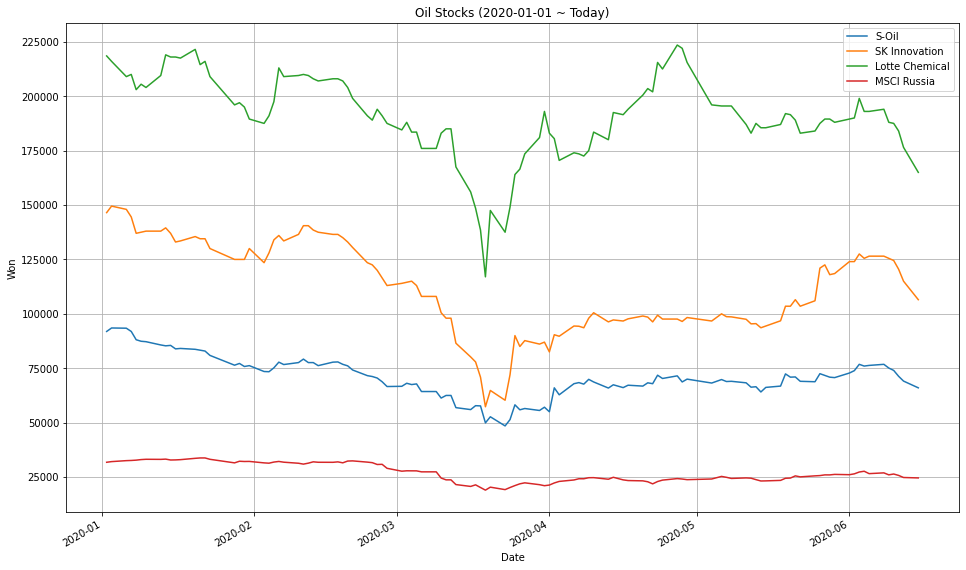

In [12]:
# Import matplotlib 
from pandas_datareader import data
import pandas_datareader as pdr
import datetime 
from datetime import date, timedelta
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')

df_oil = pd.DataFrame()

start = datetime.datetime(2020, 1, 1)
end = date.today()

symbols = {'010950.KS':'S-Oil', '096770.KS':'SK Innovation', '011170.KS':'Lotte Chemical', '265690.KS':'MSCI Russia'}

for symbol in symbols:
  oil = pdr.get_data_yahoo(symbol, start=start, end=end)
  df_oil[symbols[symbol]] = oil['Close']


# Show plot
df_oil.plot(grid=True, figsize=(16, 10))
plt.title('Oil Stocks (2020-01-01 ~ Today)')
plt.ylabel('Won')
plt.show()

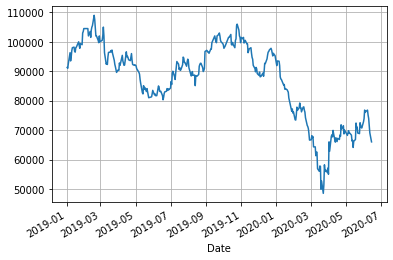

In [13]:
# https://www.datacamp.com/community/tutorials/finance-python-trading

import pandas_datareader as pdr
import datetime 
 

start = datetime.datetime(2019, 1, 1)
end = date.today()

# symbols = {'010950.KS':'S-Oil', '096770.KS':'SK Innovation', '011170.KS':'Lotte Chemical', '265690.KS':'MSCI Russia'}


aapl = pdr.get_data_yahoo('010950.KS', start=start, end=end)

# aapl = pdr.get_data_yahoo('AAPL', start=start, end=end)
# aapl = pdr.get_data_yahoo('AAPL', 
#                           start=datetime.datetime(2006, 10, 1), 
#                           end=datetime.datetime(2012, 1, 1))

# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

In [0]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

# tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
tickers = ['010950.KS', '096770.KS', '011170.KS', '265690.KS']
symbols = {'010950.KS':'S-Oil', '096770.KS':'SK Innovation', '011170.KS':'Lotte Chemical', '265690.KS':'MSCI Russia'}

# all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data = get(tickers, start, end)

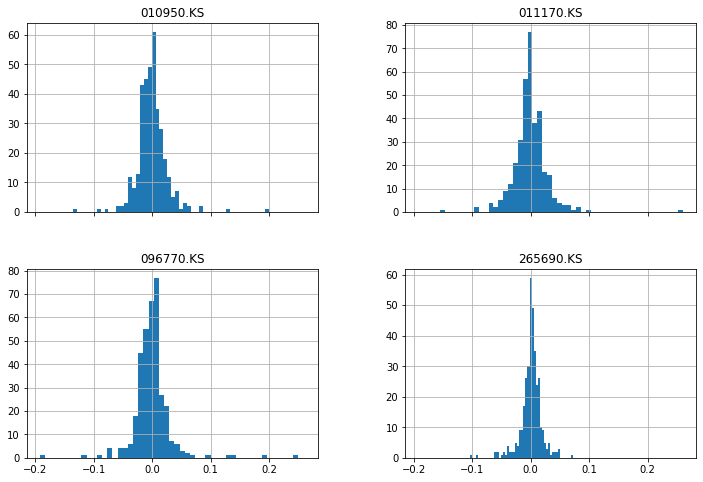

In [15]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

Ticker      010950.KS  011170.KS  096770.KS  265690.KS
Date                                                  
2019-01-02        NaN        NaN        NaN        NaN
2019-01-03   0.996714   0.972727   0.985207   1.014146
2019-01-04   1.014239   0.932727   1.000000   1.033902
2019-01-07   1.054765   0.990909   1.029586   1.045854
2019-01-08   1.024096   0.956364   1.047337   1.067561
...               ...        ...        ...        ...
2020-06-09   0.822563   0.683636   0.742604   1.269268
2020-06-10   0.810515   0.681818   0.736686   1.287805
2020-06-11   0.780942   0.669091   0.713018   1.256585
2020-06-12   0.756846   0.641818   0.680473   1.209756
2020-06-15   0.722892   0.600000   0.630178   1.200244

[357 rows x 4 columns]


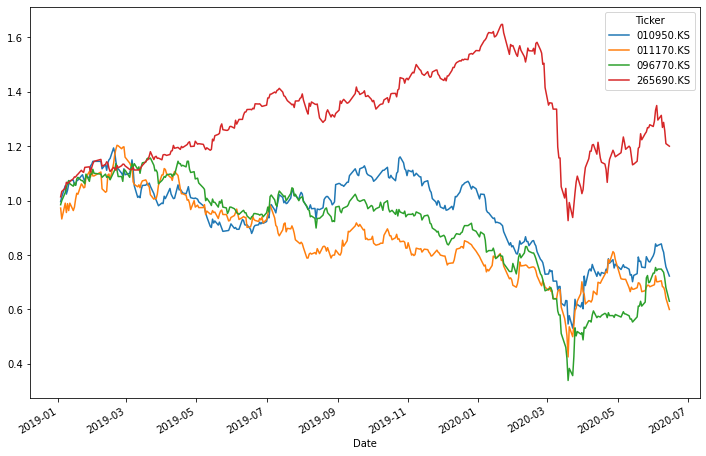

In [16]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [17]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

Ticker      010950.KS  011170.KS  096770.KS  265690.KS
Date                                                  
2019-01-31   1.072446   1.023117   1.064807   1.088688
2019-02-28   1.132466   1.130695   1.097459   1.128924
2019-03-31   1.049069   1.059545   1.123964   1.137402
2019-04-30   1.022453   1.053967   1.108795   1.190166
2019-05-31   0.926198   0.954719   0.999859   1.233055
2019-06-30   0.907362   0.932919   0.951573   1.326508
2019-07-31   0.993619   0.903953   1.008233   1.378961
2019-08-31   0.989621   0.811602   0.952804   1.330720
2019-09-30   1.089468   0.868517   0.988321   1.379551
2019-10-31   1.103792   0.856450   0.965765   1.391672
2019-11-30   1.053341   0.811636   0.924704   1.468915
2019-12-31   1.017360   0.809727   0.878698   1.499476
2020-01-31   0.927875   0.761182   0.805178   1.599085
2020-02-29   0.819441   0.731000   0.773817   1.537878
2020-03-31   0.646819   0.608926   0.531119   1.127716
2020-04-30   0.738390   0.702818   0.566420   1.148598
2020-05-31

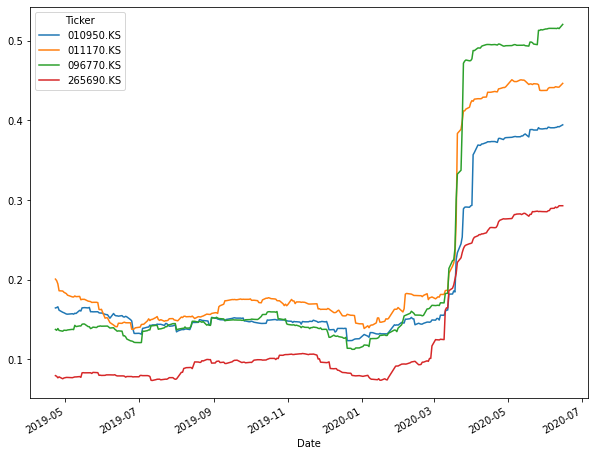

In [18]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:              096770.KS   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     498.0
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           1.71e-69
Time:                        20:33:29   Log-Likelihood:                 890.49
No. Observations:                 356   AIC:                            -1777.
Df Residuals:                     354   BIC:                            -1769.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.435      0.6

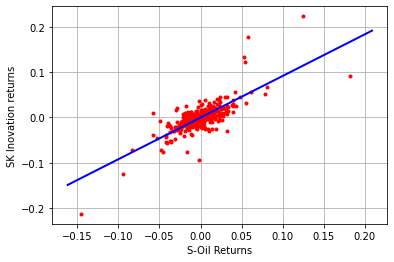

In [19]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm


# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == '010950.KS']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == '096770.KS']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['010950.KS', '096770.KS']
# tickers = ['010950.KS', '096770.KS', '011170.KS', '265690.KS']
# Add a constant 
X = sm.add_constant(return_data['010950.KS'])

# Construct the model
model = sm.OLS(return_data['096770.KS'],X).fit()

# Print the summary
print(model.summary())

# Import matplotlib
import matplotlib.pyplot as plt

# Plot returns of AAPL and MSFT
plt.plot(return_data['010950.KS'], return_data['096770.KS'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('S-Oil Returns')
plt.ylabel('SK Inovation returns')

# Show the plot
plt.show()

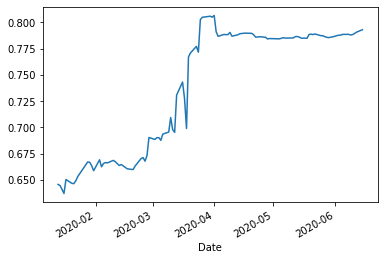

In [20]:
# Import matplotlib 
import matplotlib.pyplot as plt

# Plot the rolling correlation
return_data['096770.KS'].rolling(window=252).corr(return_data['010950.KS']).plot()

# Show the plot
plt.show()

In [21]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal    short_mavg     long_mavg  positions
Date                                                     
2019-01-02     0.0  91300.000000  91300.000000        NaN
2019-01-03     0.0  91150.000000  91150.000000        0.0
2019-01-04     0.0  91633.333333  91633.333333        0.0
2019-01-07     0.0  92800.000000  92800.000000        0.0
2019-01-08     0.0  92940.000000  92940.000000        0.0
...            ...           ...           ...        ...
2020-06-09     1.0  70005.000000  69587.000000        0.0
2020-06-10     1.0  70107.500000  69474.000000        0.0
2020-06-11     1.0  70172.500000  69332.000000        0.0
2020-06-12     1.0  70252.500000  69184.000000        0.0
2020-06-15     1.0  70217.500000  69003.000000        0.0

[357 rows x 4 columns]


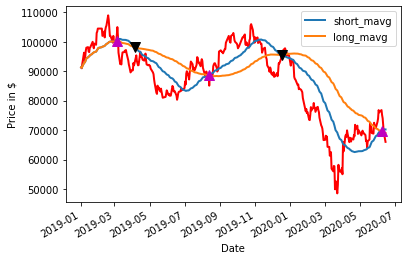

In [22]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [23]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())

            AAPL  holdings      cash     total  returns
Date                                                   
2019-01-02   0.0       0.0  100000.0  100000.0      NaN
2019-01-03   0.0       0.0  100000.0  100000.0      0.0
2019-01-04   0.0       0.0  100000.0  100000.0      0.0
2019-01-07   0.0       0.0  100000.0  100000.0      0.0
2019-01-08   0.0       0.0  100000.0  100000.0      0.0


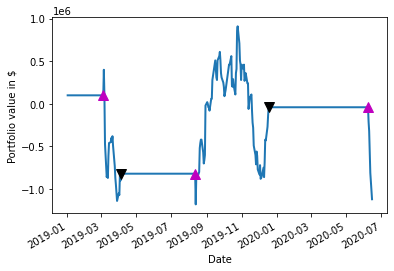

In [24]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()